In [102]:
import json
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

import networkx as nx
import igraph as ig
import leidenalg as la

### Load data

In [151]:
with open('../data/embeds.json', 'r') as f:
    embeds = json.load(f)

x = np.array(list(embeds.values()))
x = x[np.isnan(x).sum(axis=1) == 0]

MemoryError: 

In [ ]:
x = x[:5000]

### Dim reduce with tsne

In [135]:
tsne = TSNE(n_components=2, random_state=0, metric='cosine')
x_2d = tsne.fit_transform(x)

c:\Users\marcu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\marcu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\marcu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(-10.9051987670362, 0.2936303608119488, -5.482274687290191, 3.62756530046463)

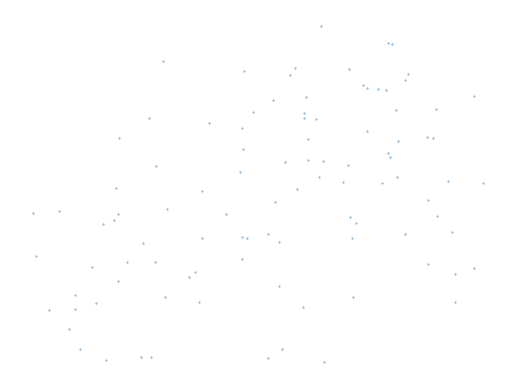

In [136]:
fig, ax = plt.subplots()
ax.scatter(x_2d[:, 0], x_2d[:, 1], s=0.1)
ax.axis('off')

### Kmeans

(-10.9051987670362, 0.2936303608119488, -5.482274687290191, 3.62756530046463)

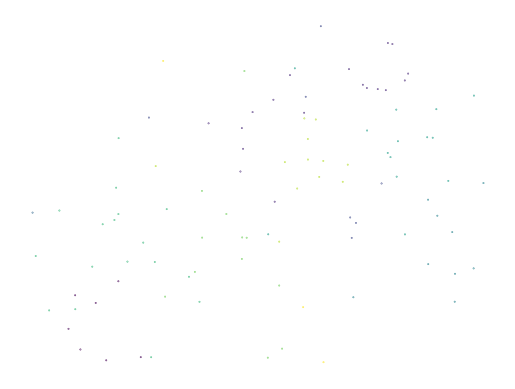

In [137]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(x)
labels = kmeans.labels_

fig, ax = plt.subplots()
ax.scatter(x_2d[:, 0], x_2d[:, 1], s=0.1, c=labels)
ax.axis('off')

### Louvain

In [138]:
g_nx = nx.read_edgelist('../data/Cit-HepPh.txt', create_using=nx.DiGraph())
g = ig.Graph.from_networkx(g_nx)

In [140]:
articles = list(embeds.keys())[:100]
sub = g.subgraph(g.vs.select(lambda x: x['_nx_name'] in articles))

In [143]:
community = la.find_partition(sub, la.ModularityVertexPartition)
sub.modularity(community)

0.6552050959906544

In [146]:
map = {key: val for key, val in zip(articles,labels)}

In [148]:
sub.vs['community'] = [map[v['_nx_name']] for v in sub.vs]

In [150]:
sub.modularity(sub.vs['community'])

0.016046198946417168